This is the second part of the first AI session!  
Here you will code a **sigmoid neuron**.

In [ ]:
#Some useful imports
import math
from pylab import *
import matplotlib.pyplot as plt
from random import *

## **Recap from the presentation**

###1. Sigmoid
The **sigmoid activation function** that we will note $\sigma$ is:  
$$\sigma(x) = \frac{1}{1+e^{-x}}$$  
And we have :  
$$\sigma'(x) = \sigma(x)(1-\sigma(x))$$
$$\\[0.2 cm]$$
###2. Loss function
Let's consider:  
$~~~~~$-$\hat{y_k}$ the value to predict for the k-th training.

$~~~~~$-$y_k$ The predicted value by the model for the k-th training.

$~~~~~$-n the number of training samples.

The **loss function** is the following:
$$L = \frac{1}{n}\sum_{k =1}^n(\hat{y_k} - y_k)^2$$
$$\\[0.4 cm]$$

*$\rightarrow$How to compute $\frac{\partial L}{\partial \omega_i}$ for the k-th input?*

Let's consider $h_k$, the output of the perceptron, and $y_k$ after the sigmoid function:  

$$
h_k = \sum_{i} a_{i}^{k}*w_{i} + b \\  
y_k = \sigma(h_k)
$$

Using the *chain rule*,
$$\frac{\partial L}{\partial \omega_i} = \frac{\partial L}{\partial y_k} \frac{\partial y_k}{\partial h_k}\frac{\partial h_k}{\partial w_i}$$

we have:
$$\frac{\partial L}{\partial \omega_i} = -2(\hat{y_i} - y_i) \sigma'(h_k)a_{i}^k$$

To simplify the calculations during the execution of the algorithm we will note:

$$\delta  = -2(\hat{y_i} - y_i)\sigma'(h_k)$$

and we get: $$\frac{\partial L}{\partial \omega_i} = \delta a_{i}^k$$

###3. Updating

Let's consider $w^{(n)}$ and $b^{(n)}$ the walues of the weights and the bias at step n.

In order to update the weights and biases, we use the following equation:

$$\forall i, \ \ \ w_i^{(n+1)} = w_i^{(n)} - η\frac{\partial L}{\partial \omega_i}$$
$$b^{(n+1)} = b^{(n)} - η\frac{\partial L}{\partial b}$$

Where $\eta$ is a given value called the *learning rate*.

In [ ]:
"""
The sigmoid function
"""
def sigmoid(valeur):
  return(1 / (1 + exp( - valeur )))

In [ ]:
class Neuron:

  """
  Build of a perceptron
  weights : List of weights
  bias : The bias.
  """
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias


  """
  Function called when you want to get the output from the input
  input : List of input values.
  """
  def forward(self, input):
    assert(len(input) == len(self.weights))
    sum = self.bias
    for inp, w in zip(input, self.weights):
      sum += inp * w
    return(sigmoid(sum))

  """
  Function to compute the delta value
  """
  def delta(self, predicted_output, expected_output, input):
    sum = self.bias
    for inp, w in zip(input, self.weights):
      sum += inp * w
    deriv_sigma =   sigmoid(sum) * (1 - sigmoid(sum))
    return -2 * (expected_output - predicted_output) * deriv_sigma

  """
  Updates the weights and bias
  """
  def backward(self, input, delta):
    learning_rate = 0.1

    self.bias = self.bias - learning_rate * delta
    for i in range(len( self.weights )):
      self.weights[i] = self.weights[i] - learning_rate * delta * input[i]
    
  """
  Computes the output from the input using our neuron.
  """
  def predict(self, input):
    return int(round(self.forward(input)))
    
  """
  Computes the accuracy of our neuron.
  inputs: List of List of inputs
  outputs: list of the expected output values.
  """
  def accuracy(self, inputs, outputs):
    mean = 0
    for i in range(len(inputs)):
      mean += (self.predict(inputs[i]) == outputs[i])
    return (mean / len(outputs) * 100)


Now that you have programmed a **sigmoid neuron**, you can use it! Let's try to allow this neuron to **learn** to reproduce the behavior of an OR gate.
This time, you don't have to look for the right weights and biases yourself. They will be learned automatically.

In [ ]:
# Example for a OR gate:

or_neuron = Neuron([random(),random()], random()) # Build a neuron with random weights and bias
or_input = [[1,1], [1,0], [0,1], [0,0]] # List of possible inputs for the neuron 
or_output = [1, 1, 1, 0] # List of the expected outputs

##Training the Neuron

Now that we have created the neuron, we will have to train it!  
So we have to make a loop that trains the neuron enough to predict all the outputs correctly. We call **epochs** the number of times we will go through this loop. One **epoch** corresponds to one training on all the data. So, to train on 10 epochs is training the neuron 10 times on the 4 inputs data.
For each epoch we need:

1.   Run the data through the neural network
2.   Compute the loss
3.   Backpropagate the loss

In order to be able to follow the evolution of our neuron, calculate, at each end of loop, the accuracy and save it somewhere. You can then draw a graph to see if the accuracy of your neuron is increasing over time.

In [ ]:
# Training
accuracy = []
nb_epochs = 2000
for j in range(nb_epochs):
  for i in range(len(or_input)):
    outputvalue = or_neuron.forward(or_input[i])
    delta = or_neuron.delta(outputvalue, or_output[i], or_input[i])
    or_neuron.backward(or_input[i],delta)
  accuracy.append(or_neuron.accuracy(or_input,or_output))

If you are here, it means that you have trained a neuron to reproduce an OR gate! Check by yourself the outputs

In [ ]:
for i in range(4):
  print("Predicted : "+str(or_neuron.predict(or_input[i]))+" Expected ouput : "+str(or_output[i]))

Predicted : 1 Expected ouput : 1
Predicted : 1 Expected ouput : 1
Predicted : 1 Expected ouput : 1
Predicted : 0 Expected ouput : 0


Using plt.plot, check how the accuracy has evolved

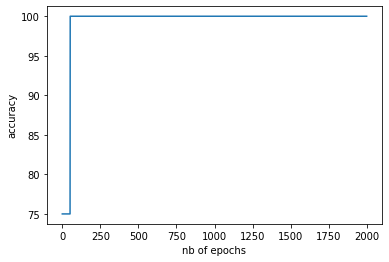

In [ ]:
plt.plot(accuracy)
plt.xlabel("nb of epochs")
plt.ylabel("accuracy")
plt.show()


To understand what exactly our little neuron does, we will draw its decision line.
This line corresponds to the case $y = \frac{1}{2}$ where $y$ represents the output for a ($x_2$,$x_1$).

$ y = \frac{1}{2} \iff x_2w_2 + x_1w_1 + b = 0 \iff x_2 = \frac{-x_1w_1 - b}{w_2}$


To draw the decision line, we have to draw $f$ where $f(x) = \frac{-w_1x - b}{w_2}$


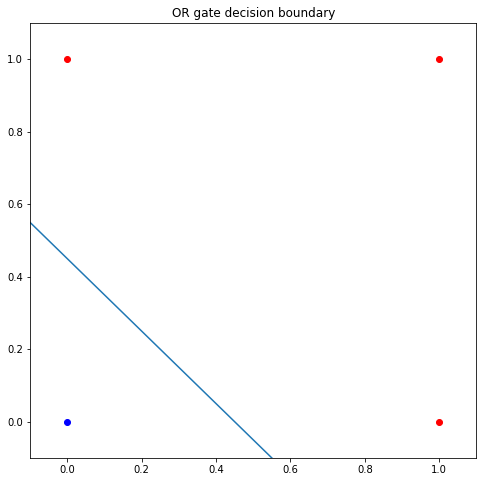

In [ ]:
x = linspace(-0.1, 1.1, 30)

y = -or_neuron.weights[0] / or_neuron.weights[1] * x - or_neuron.bias / or_neuron.weights[1]

plt.figure(figsize=(8,8))
plt.plot(x, y)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.scatter([0,1,1], [1,0,1], c = 'red')
plt.scatter([0], [0], c = 'blue')
plt.title("OR gate decision boundary")
plt.show()

And if you now try to train a sigmoid neuron to reproduce the behavior of an XOR gate...?

In [ ]:
# CORRECTION: It is not possible to have ONE sigmoid neuron that learns to reproduce an XOR gate
xor_neuron = Neuron([randint(0,20),randint(0,20)], randint(-20,-15))
xor_input = [[1,1], [1,0], [0,1], [0,0]]
xor_output = [0, 1, 1, 0]

In [ ]:
# Training
epochs_xor = 3000
accuracy_xor = []
for i in range(epochs_xor):
  for i in range(4):
    output_value = xor_neuron.forward(xor_input[i])
    delta = xor_neuron.delta(output_value, xor_output[i],xor_input[i])
    xor_neuron.backward(xor_input[i], delta)
  accuracy_xor.append(xor_neuron.accuracy(xor_input, xor_output))


Let's see what we have after the training

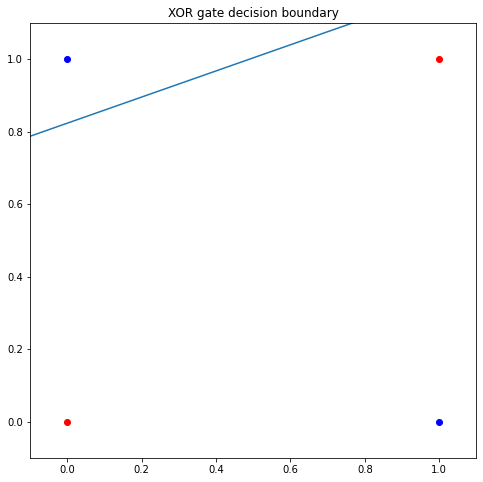

In [ ]:
# Decision line
x = linspace(-0.1, 1.1, 30)
y = - xor_neuron.weights[0] / xor_neuron.weights[1] * x - xor_neuron.bias / xor_neuron.weights[1]

plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.scatter([0,1], [0,1], c = 'red')
plt.scatter([0,1], [1,0], c = 'blue')
plt.title("XOR gate decision boundary")
plt.show()

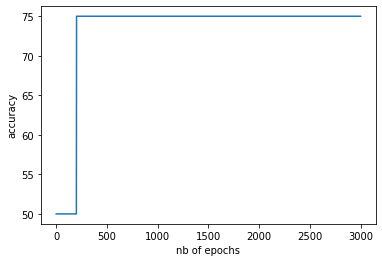

In [ ]:
#plot of the accuracy
x = range(epochs_xor)
y = accuracy_xor
plt.plot(x, y)
plt.xlabel("nb of epochs")
plt.ylabel("accuracy")
plt.show()

We'll see next time how to make a XOR gate... And even more !